<a href="https://colab.research.google.com/github/juliastarzycka/HackIllinois-HackThis-this.hack-Education/blob/master/HackIllinois_Hack_This_Education_Data_Visualization_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing a Virtual Education Platform**

## An analysis on a virtual education platform used by one of the largest universities in the UK

## Opening the file and examining the data:

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import csv
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
os.listdir('/content')

['.config',
 'studentVle.csv',
 '472058_885513_compressed_studentAssessment.csv.zip',
 '472058_885513_compressed_studentInfo.csv.zip',
 '472058_885513_compressed_studentRegistration.csv.zip',
 'sample_data']

The dataset is from https://www.kaggle.com/anlgrbz/student-demographics-online-education-dataoulad.

In [3]:
assessments = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets%2F472058%2F885513%2Fassessments.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1597528473&Signature=bbGyKmyFCGal9kUdPihrUNzDrcNAhJlh%2BiiTihZIwBEjVoycr7w6pAqA%2BPxe0TDOtBi4aN%2FsUQhGYNf5IT%2BW3gyhbP%2FpInpPvLmNHYza6UkDdYczNaTov4fGj9uMa%2BHNce1tf90YIuY3hB8%2BKUlx9bUtiIYmVbof1PLOqud2R9TgdoeivU2Ei1dWsia0QgUBjajW15fG8wDIWZxGa5MRH6BgaHBCfmhYWyHDa30CO6Y2coTyDWZf8poN6aiCFIAuXasPfeGZ%2BP%2F1pxqISyYw37x5aKIEje7I7CA0lXTEm9CjZiaV9eqaCe6vsJdYBbUNikpY%2FCyBry%2BhtHFCiGuNmQ%3D%3D')
courses = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets%2F472058%2F885513%2Fcourses.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1597528627&Signature=CrPts0lHwE0FNvGo98B2eMNpmDXjqSlkoeC8mfo8i5cdyW4A4zOXom1fkZ7L6OXmag2HmrGl%2FoCgzKXCou%2Bx%2BwwBjzaZje5Y%2BrgzCBOa7T1rH7G3GY88jRkFrnzTj8SVH6DqR0DGzIscEdN%2FINGBFKec5P10PznDo1P905YwiD%2BaJSY87nq%2B2%2FQni3ZkhD56Aj3SuL%2Bsm3jV4zRfRp2TOUC3z8yGGPLLlVDGZg5Wg9ItqOqnuEGQztgGcrnPiVPB4XGbyI85Gi%2FwuIeRIhdaGWcdPtxzSTBY8id9AWqLgrJdRGIJsCrxqqo%2Bh%2F21TRTNhugK12Yl%2BPwDXx%2FrDsTsgA%3D%3D')
vle = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets%2F472058%2F885513%2Fvle.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1597528662&Signature=Z8SRENtYWWJzoRQMOWRmbo0sMsFKinYK7oUTzlaOz1t4JyvbgZ2XKbeytCjpfY1QYIWw7nr%2BvQHVIr18UVaKfG1UDs%2FHMuT4Jq%2B%2BYL318e0kum9GciFNnBsRQ9yqA709DWn2r%2Fr%2BpYqlfJbnIhnVaihj%2BobfyU1F%2F2yu6uoCsZ03%2FP%2BRzpBzez2GWWf4XM03TMbUqBf%2B8%2FLQonUWVczlxPVIOnlaWQfP%2BWTuBPcUzVCEqJI8y8jDFG4N%2FponBLzDKGczyO6qVdPk2IRG5x1pqJ1ZqDaPlU4Pt6OrZFpttkyrSIw%2FT2%2BxWN3i1aAzrZrwJlDt%2BMo%2BjichIHvBqUmvyw%3D%3D')

In [4]:
student_assessment = pd.read_csv('/content/472058_885513_compressed_studentAssessment.csv.zip')
student_info = pd.read_csv('/content/472058_885513_compressed_studentInfo.csv.zip')
student_registration = pd.read_csv('/content/472058_885513_compressed_studentRegistration.csv.zip')
student_vle = pd.read_csv('/content/studentVle.csv', quoting=csv.QUOTE_NONE)

### assessments

In [5]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [6]:
assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [7]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [8]:
assessments[assessments['date'].isna() == True]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [9]:
assessments = assessments.drop(columns=['date'])

In [10]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   weight             206 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.2+ KB


### courses

In [11]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [12]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [13]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


### student_assessment

In [14]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [15]:
student_assessment[student_assessment['is_banked'] == 1].describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,1909.000000,1.909000e+03,1909.0,1909.0,1908.000000
mean,25451.644840,7.159469e+05,-1.0,1.0,74.345912
std,8415.559318,6.480624e+05,0.0,0.0,17.432884
min,1758.000000,8.462000e+03,-1.0,1.0,0.000000
25%,15016.000000,4.156980e+05,-1.0,1.0,64.000000
50%,25359.000000,5.263030e+05,-1.0,1.0,76.000000
75%,34878.000000,6.058590e+05,-1.0,1.0,87.000000
max,37442.000000,2.694680e+06,-1.0,1.0,100.000000


In [16]:
student_assessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [17]:
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [18]:
pd.Series(student_assessment['score'].unique()).sort_values(ascending=False)

81     100.0
80      99.0
72      98.0
78      97.0
91      96.0
       ...  
101      3.0
100      2.0
97       1.0
67       0.0
45       NaN
Length: 102, dtype: float64

In [19]:
student_assessment[student_assessment['id_student'] == 2674822]

,id_assessment,id_student,date_submitted,is_banked,score


In [20]:
student_assessment_and_registration = student_assessment.merge(student_registration, how='left').merge(student_info, how='left')

In [21]:
student_assessment_and_registration[student_assessment_and_registration['score'].isna() == True]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
237,1752,721259,22,0,NaN,AAA,2013J,-73.0,23.0,F,South Region,Lower Than A Level,50-60%,55<=,0,120,N,Withdrawn
238,1752,721259,22,0,NaN,AAA,2014J,-30.0,128.0,F,South Region,Lower Than A Level,50-60%,55<=,1,60,N,Withdrawn
996,1754,260355,127,0,NaN,AAA,2013J,-186.0,170.0,F,London Region,A Level or Equivalent,80-90%,35-55,0,60,N,Withdrawn
997,1754,260355,127,0,NaN,AAA,2014J,-156.0,-87.0,F,London Region,A Level or Equivalent,80-90%,35-55,1,120,N,Withdrawn
2508,1760,2606802,180,0,NaN,AAA,2014J,-37.0,NaN,M,North Region,A Level or Equivalent,60-70%,0-35,0,60,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180383,34903,582670,241,0,NaN,FFF,2014J,-129.0,NaN,M,South Region,Lower Than A Level,90-100%,35-55,0,60,Y,Fail
192119,37415,610738,87,0,NaN,GGG,2013J,-23.0,NaN,F,London Region,Lower Than A Level,10-20,35-55,0,30,N,Fail
199671,37427,631786,221,0,NaN,GGG,2014B,-11.0,NaN,F,East Anglian Region,A Level or Equivalent,0-10%,0-35,0,30,Y,Pass
203103,37435,648110,62,0,NaN,GGG,2014J,-86.0,68.0,F,London Region,Lower Than A Level,10-20,0-35,0,60,N,Withdrawn


The missing values in score are random and not because someone withdrew from the class. Thus, they should be dropped.

In [22]:
student_assessment = student_assessment.dropna(subset=['score'])

### student info

In [23]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [24]:
student_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [25]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [26]:
student_info = student_info.dropna(subset=['imd_band'])

We want to consider a younger audience in this data set since we are seeking solutions for teachers  and professors for COVID-19 virtual learning. 

In [27]:
student_info_young = student_info[student_info['age_band'] == '0-35']

In [28]:
len(student_info_young) / len(student_info) #This is still a significant amount of the data.

0.707451877263198

In [29]:
len(student_info_young) 

22272

In [30]:
student_info_young.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
11,AAA,2013J,58873,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass


In [31]:
student_info_young.describe()

,id_student,num_of_prev_attempts,studied_credits
count,2.227200e+04,22272.000000,22272.000000
mean,6.375478e+05,0.160695,81.641523
std,4.550746e+05,0.471155,41.232246
min,2.362900e+04,0.000000,30.000000
25%,5.066985e+05,0.000000,60.000000
50%,5.860470e+05,0.000000,60.000000
75%,6.323052e+05,0.000000,120.000000
max,2.716795e+06,6.000000,585.000000


In [32]:
student_info[student_info['id_student'] == 2674822]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
31008,GGG,2013J,2674822,F,North Western Region,A Level or Equivalent,0-10%,0-35,0,30,N,Fail


### student_registration

In [33]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [34]:
student_registration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [35]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


### student_vle

In [36]:
student_vle.head()

,"""code_module""","""code_presentation""","""id_student""","""id_site""","""date""","""sum_click"""
0,"""AAA""","""2013J""","""28400""","""546652""","""-10""","""4"""
1,"""AAA""","""2013J""","""28400""","""546652""","""-10""","""1"""
2,"""AAA""","""2013J""","""28400""","""546652""","""-10""","""1"""
3,"""AAA""","""2013J""","""28400""","""546614""","""-10""","""11"""
4,"""AAA""","""2013J""","""28400""","""546714""","""-10""","""1"""


In [37]:
student_vle = student_vle.replace({'"':''}, regex = True)
student_vle.columns = ['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click']

In [38]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [39]:
student_vle.describe()

,code_module,code_presentation,id_student,id_site,date,sum_click
count,10655280,10655280,10655280,10655280,10655280,10655280
unique,7,4,26074,6268,295,498
top,FFF,2014J,537811,882537,18,1
freq,4014499,3619452,6389,157590,103112,5113910


In [40]:
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         object
 3   id_site            object
 4   date               object
 5   sum_click          object
dtypes: object(6)
memory usage: 487.8+ MB


In [41]:
student_vle[student_vle['date'].isna() == True]

,code_module,code_presentation,id_student,id_site,date,sum_click


In [42]:
student_vle[student_vle['sum_click'].isna() == True]

,code_module,code_presentation,id_student,id_site,date,sum_click


In [43]:
student_vle = student_vle.dropna(subset=['date'])

In [44]:
student_vle['id_student'] = student_vle['id_student'].astype('int')

In [45]:
student_vle['id_site'] = student_vle['id_site'].astype('int')

In [46]:
student_vle['date'] = student_vle['date'].astype('int')

In [47]:
student_vle['sum_click'] = student_vle['sum_click'].astype('int')

In [48]:
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 569.1+ MB


In [49]:
student_vle[student_vle['id_student'] == 2674822]

,code_module,code_presentation,id_student,id_site,date,sum_click
10270521,GGG,2013J,2674822,661585,-11,4
10270522,GGG,2013J,2674822,661575,-11,1
10277634,GGG,2013J,2674822,661724,2,1
10277635,GGG,2013J,2674822,661804,2,2
10277636,GGG,2013J,2674822,661693,2,2
10277637,GGG,2013J,2674822,661711,2,1
10277638,GGG,2013J,2674822,661694,2,2
10277639,GGG,2013J,2674822,661710,2,1
10277640,GGG,2013J,2674822,661705,2,1
10277641,GGG,2013J,2674822,661807,2,1


### vle

In [50]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [51]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [52]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [53]:
vle = vle.drop(columns=['week_from', 'week_to'])

## Let's get some info about the students!

In [54]:
student_info_young.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
11,AAA,2013J,58873,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass


### General information

In [55]:
# Number of courses the students are taking
print(f"Number of courses: {len(student_info_young.code_module.unique())}")

Number of courses: 7


In [56]:
# Average number of students by course and by semester (B and J)
student_info_young.groupby(['code_module','code_presentation']).count()['id_student']

code_module  code_presentation
AAA          2013J                 175
             2014J                 168
BBB          2013B                1184
             2013J                1462
             2014B                1094
             2014J                1505
CCC          2014B                1336
             2014J                1665
DDD          2013B                 885
             2013J                1415
             2014B                 883
             2014J                1299
EEE          2013J                 757
             2014B                 510
             2014J                 890
FFF          2013B                1077
             2013J                1659
             2014B                1083
             2014J                1684
GGG          2013J                 586
             2014B                 513
             2014J                 442
Name: id_student, dtype: int64

### Distribution of the features

In [57]:
print(f"Total students in registry: {len(student_info_young.id_student.unique())}\n\n")
print(f"Distribution of {student_info_young.groupby('gender').count()['id_student']}\n\n")
print(f"Distribution of {student_info_young.groupby('age_band').count()['id_student']}\n\n")
print(f"Distribution of {student_info_young.groupby('highest_education').count()['id_student']}\n\n")
print(f"Distribution of {student_info_young.groupby('region').count()['id_student']}\n\n")

Total students in registry: 19575


Distribution of gender
F     9919
M    12353
Name: id_student, dtype: int64


Distribution of age_band
0-35    22272
Name: id_student, dtype: int64


Distribution of highest_education
A Level or Equivalent          10432
HE Qualification                2471
Lower Than A Level              9052
No Formal quals                  275
Post Graduate Qualification       42
Name: id_student, dtype: int64


Distribution of region
East Anglian Region     2375
East Midlands Region    1711
Ireland                  656
London Region           2126
North Region             872
North Western Region    2093
Scotland                2272
South East Region       1460
South Region            2095
South West Region       1728
Wales                   1412
West Midlands Region    1958
Yorkshire Region        1514
Name: id_student, dtype: int64




In [58]:
def make_grouped_fig_all_data(var1, var2, title):
  df = pd.DataFrame(student_info.groupby(var1).count()[var2]).reset_index()
  return px.bar(df, x=var1, y=var2, title=title, color=var1)

In [59]:
make_grouped_fig_all_data('age_band','id_student','Age Distribution')

In [60]:
def make_grouped_fig(var1, var2, title):
  df = pd.DataFrame(student_info_young.groupby(var1).count()[var2]).reset_index()
  return px.bar(df, x=var1, y=var2, title=title, color=var1)

In [61]:
make_grouped_fig('gender','id_student','Gender Distribution')

In [62]:
make_grouped_fig('highest_education','id_student','Education Distribution')

In [63]:
make_grouped_fig('code_module','id_student','Num of students by course')

In [64]:
make_grouped_fig('final_result','id_student','Course Distribution')

In [65]:
make_grouped_fig('imd_band','id_student','Multiple Deprevation Index (Poverty) Distribution')

### Analyzing student data by age group

In [66]:
df = student_info.groupby(['imd_band','age_band','final_result']).count()['id_student']
df_1 = pd.DataFrame(df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()
px.bar(df_1, x='imd_band', y='id_student', title='Final Grade by Age group (% of students)', color='final_result')

In [67]:
df_1.query("age_band =='0-35'")

,imd_band,age_band,final_result,id_student
0,0-10%,0-35,Distinction,3.775294
1,0-10%,0-35,Fail,20.960435
2,0-10%,0-35,Pass,22.077922
3,0-10%,0-35,Withdrawn,28.964059
8,10-20,0-35,Distinction,3.953356
9,10-20,0-35,Fail,19.624573
10,10-20,0-35,Pass,24.004551
11,10-20,0-35,Withdrawn,26.877133
19,20-30%,0-35,Distinction,4.515599
20,20-30%,0-35,Fail,17.569787


In [68]:
df = student_info.groupby(['age_band', 'imd_band', 'final_result',]).count()['id_student']
df_1 = pd.DataFrame(df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()
px.bar(df_1, x='age_band', y='id_student', title='Final Grade by Age group (% of students)', color='final_result', barmode='group', hover_name='imd_band')

In [69]:
df = student_info.groupby(['age_band','imd_band']).count()['id_student']
df_1 = pd.DataFrame(df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()
px.bar(df_1, x='age_band', y='id_student', title='Poverty level by Age group (% of students)', color='imd_band')

### Analyzing student data in the younger student (0-35 years old) data slice

In [70]:
df = student_info_young.groupby(['highest_education','imd_band']).count()['id_student']
df_1 = pd.DataFrame(df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()
px.bar(df_1, x='highest_education', y='id_student', title='Highest Education by poverty level (% of students)', color='imd_band')

In [71]:
df = student_info_young.groupby(['final_result','imd_band']).count()['id_student']
df_1 = pd.DataFrame(df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()
px.bar(df_1, x='final_result', y='id_student', title='Final Grade by poverty level (% of students)', color='imd_band')

In [72]:
df = student_info_young.groupby(['code_module','imd_band']).count()['id_student']
df_1 = pd.DataFrame(df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()
px.bar(df_1, x='code_module', y='id_student', title='Course student body by poverty level (% of students)', color='imd_band')

In [73]:
df = student_info_young.groupby(['region','imd_band']).count()['id_student']
df_1 = pd.DataFrame(df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))).reset_index()
px.bar(df_1, x='region', y='id_student', title='Poverty level by region (% of students)', color='imd_band')

#### Analyzing what factors influence whether a student passes, fails, withdraws, or passes with distinction

In [74]:
student_info_young.pivot_table(index=['final_result', 'imd_band'], values='studied_credits', aggfunc=['count', 'mean'])

count            mean
                      studied_credits studied_credits
final_result imd_band                                
Distinction  0-10%                125       71.080000
             10-20                139       76.007194
             20-30%               165       73.666667
             30-40%               207       75.386473
             40-50%               204       70.882353
             50-60%               185       70.351351
             60-70%               172       74.127907
             70-80%               188       68.138298
             80-90%               178       75.112360
             90-100%              189       77.222222
Fail         0-10%                694       77.838617
             10-20                690       79.036232
             20-30%               642       78.091900
             30-40%               585       78.290598
             40-50%               501       78.572854
             50-60%               512       76.240234
             60-70%               394       75.482234
             70-80%               434       77.016129
             80-90%               383       77.937337
             90-100%              300       79.166667
Pass         0-10%                731       76.080711
             10-20                844       75.343602
             20-30%               871       77.319173
             30-40%               909       77.931793
             40-50%               818       77.127139
             50-60%               828       75.585749
             60-70%               820       73.817073
             70-80%               784       75.299745
             80-90%               786       76.634860
             90-100%              739       75.284168
Withdrawn    0-10%                959       94.473410
             10-20                945       93.052910
             20-30%              1015       94.665025
             30-40%               788       93.362944
             40-50%               747       95.568942
             50-60%               643       89.269051
             60-70%               602       89.335548
             70-80%               538       87.936803
             80-90%               571       92.495622
             90-100%              447       91.879195

Students do better if they take less credits, compared to students with a similar Multiple Depravation Index that take more credits.

#### Analyzing how gender, disability, and the Index of Multiple Depravation (measure of poverty) correlate with final result and assessment scores in younger students

In [75]:
student_info_young.pivot_table(index=[ 'gender', 'final_result'], values='id_student', aggfunc=['count'])

count
                    id_student
gender final_result           
F      Distinction         789
       Fail               2239
       Pass               3703
       Withdrawn          3188
M      Distinction         963
       Fail               2896
       Pass               4427
       Withdrawn          4067

In [76]:
student_info_young.pivot_table(index=['disability', 'final_result'], values='id_student', aggfunc=['count'])

count
                        id_student
disability final_result           
N          Distinction        1592
           Fail               4614
           Pass               7420
           Withdrawn          6355
Y          Distinction         160
           Fail                521
           Pass                710
           Withdrawn           900

In [77]:
student_info_young.pivot_table(index=['imd_band', 'final_result'], values='id_student', aggfunc=['count'])

count
                      id_student
imd_band final_result           
0-10%    Distinction         125
         Fail                694
         Pass                731
         Withdrawn           959
10-20    Distinction         139
         Fail                690
         Pass                844
         Withdrawn           945
20-30%   Distinction         165
         Fail                642
         Pass                871
         Withdrawn          1015
30-40%   Distinction         207
         Fail                585
         Pass                909
         Withdrawn           788
40-50%   Distinction         204
         Fail                501
         Pass                818
         Withdrawn           747
50-60%   Distinction         185
         Fail                512
         Pass                828
         Withdrawn           643
60-70%   Distinction         172
         Fail                394
         Pass                820
         Withdrawn           602
70-80%   Distinction         188
         Fail                434
         Pass                784
         Withdrawn           538
80-90%   Distinction         178
         Fail                383
         Pass                786
         Withdrawn           571
90-100%  Distinction         189
         Fail                300
         Pass                739
         Withdrawn           447

In [78]:
student_info_young_and_assessment = student_info_young.merge(student_assessment, how='inner', on='id_student')

In [79]:
student_info_young_and_assessment.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1752,26,0,69.0
1,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1753,75,0,30.0
2,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1754,124,0,63.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1755,181,0,35.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1756,222,0,75.0


In [82]:
student_info_young_and_assessment.pivot_table(index=[ 'final_result','gender', 'disability'], values='score', aggfunc=['count', 'mean'])

count       mean
                                score      score
final_result gender disability                  
Distinction  F      N            6624  86.917874
                    Y             901  87.904550
             M      N            9291  88.433000
                    Y             802  87.051122
Fail         F      N            9087  65.681633
                    Y            1231  64.826158
             M      N           12223  63.850610
                    Y            1320  62.795455
Pass         F      N           29808  76.065754
                    Y            3472  74.514689
             M      N           41435  75.871510
                    Y            3424  74.316589
Withdrawn    F      N            5603  67.697305
                    Y            1113  67.708895
             M      N            9705  68.804019
                    Y            1472  67.731658

The above table considers the intersectionality of gender and disability.

In [83]:
student_info_young_and_assessment.pivot_table(index=['final_result', 'imd_band'], values='score', aggfunc=['count', 'mean'])

count       mean
                      score      score
final_result imd_band                 
Distinction  0-10%     1228  85.963355
             10-20     1411  87.736357
             20-30%    1714  87.575846
             30-40%    2084  86.803743
             40-50%    2086  87.478907
             50-60%    1896  88.389768
             60-70%    1622  88.705302
             70-80%    1811  88.888459
             80-90%    1823  87.398793
             90-100%   1943  88.407617
Fail         0-10%     3198  63.861789
             10-20     3023  63.332782
             20-30%    2635  64.375332
             30-40%    2718  64.243561
             40-50%    2278  66.619403
             50-60%    2430  63.648560
             60-70%    1935  64.926098
             70-80%    2106  64.280152
             80-90%    1930  66.470466
             90-100%   1608  64.887438
Pass         0-10%     7098  74.630882
             10-20     8157  75.225573
             20-30%    8423  75.897899
             30-40%    8992  75.567060
             40-50%    7706  75.818842
             50-60%    7732  75.869633
             60-70%    7833  75.788970
             70-80%    7513  75.886597
             80-90%    7614  76.657998
             90-100%   7071  76.905388
Withdrawn    0-10%     2016  66.760417
             10-20     1887  68.646529
             20-30%    2450  66.236327
             30-40%    2030  68.696552
             40-50%    1863  67.937735
             50-60%    1612  68.613524
             60-70%    1631  67.370325
             70-80%    1441  67.159611
             80-90%    1670  73.289222
             90-100%   1293  69.628770

#### Analyzing student engagement by frequency and sum of clicks on the online learning platform (by imd band, gender, and disability)

In [84]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [85]:
vle_agg = student_vle.pivot_table(index=['id_student'], values='sum_click', aggfunc=['count', 'sum', 'mean', 'median'])

In [86]:
vle_agg= vle_agg.reset_index()

In [87]:
vle_agg.columns = ['id_student',  'click_frequency', 'total_clicks', 'session_click_avg', 'session_click_median']

In [88]:
vle_agg.head()

,id_student,click_frequency,total_clicks,session_click_avg,session_click_median
0,6516,662,2791,4.216012,2.0
1,8462,304,656,2.157895,1.0
2,11391,196,934,4.765306,2.0
3,23629,59,161,2.728814,2.0
4,23698,305,910,2.983607,1.0


In [89]:
student_info_young_and_vle = student_info_young.merge(vle_agg, how='inner', on='id_student')

In [90]:
student_info_young_and_vle.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,click_frequency,total_clicks,session_click_avg,session_click_median
0,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,352,1034,2.937500,2.0
1,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass,355,1492,4.202817,2.0
2,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass,531,1428,2.689266,2.0
3,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass,593,1894,3.193929,2.0
4,AAA,2013J,58873,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass,526,1732,3.292776,2.0


In [91]:
assessment_agg = student_assessment.pivot_table(index=['id_student'], values='score', aggfunc=['count', 'mean'])

In [92]:
assessment_agg = assessment_agg.reset_index()

In [93]:
assessment_agg

,id_student,count,mean
,,score,score
0,6516,5,61.800000
1,8462,7,87.000000
2,11391,5,82.000000
3,23629,4,82.500000
4,23698,9,74.444444
...,...,...,...
23346,2698251,7,58.142857
23347,2698257,5,67.800000
23348,2698535,8,39.250000


In [94]:
assessment_agg.columns = ['id_student', 'assessment_count', 'assessment_score_avg']

In [95]:
assessment_agg

,id_student,assessment_count,assessment_score_avg
0,6516,5,61.800000
1,8462,7,87.000000
2,11391,5,82.000000
3,23629,4,82.500000
4,23698,9,74.444444
...,...,...,...
23346,2698251,7,58.142857
23347,2698257,5,67.800000
23348,2698535,8,39.250000
23349,2698577,5,64.400000


In [96]:
student_info_young_and_vle = student_info_young_and_vle.merge(assessment_agg, how='left', on='id_student')

In [97]:
student_info_young_and_vle.pivot_table(index=['imd_band'], values=['click_frequency', 'total_clicks','assessment_score_avg'], aggfunc=['mean'])

mean                             
         assessment_score_avg click_frequency total_clicks
imd_band                                                  
0-10%               68.951151      345.335175  1248.389503
10-20               70.089170      347.395743  1270.967420
20-30%              70.673900      373.111479  1337.081641
30-40%              71.833434      388.287599  1434.722076
40-50%              72.509699      379.675048  1403.825919
50-60%              72.125521      399.746142  1486.487805
60-70%              72.647640      410.944685  1458.600868
70-80%              72.934962      415.154914  1485.904498
80-90%              74.427968      433.619373  1606.824501
90-100%             74.587144      433.391360  1585.327827

In [98]:
student_info_young_and_vle.pivot_table(index=['final_result','imd_band'], values=['click_frequency', 'total_clicks','assessment_score_avg'], aggfunc=['mean'])

mean                             
                      assessment_score_avg click_frequency total_clicks
final_result imd_band                                                  
Distinction  0-10%               85.757288      688.720000  2690.416000
             10-20               87.596441      749.971223  2950.611511
             20-30%              87.508772      748.921212  2859.109091
             30-40%              86.601650      754.903382  2938.985507
             40-50%              87.205004      699.759804  2738.995098
             50-60%              87.914659      880.427027  3412.313514
             60-70%              88.534135      689.197674  2607.215116
             70-80%              88.576541      735.707447  2777.255319
             80-90%              87.204841      666.724719  2549.426966
             90-100%             88.356907      752.396825  2913.544974
Fail         0-10%               62.317685      212.567278   755.417431
             10-20               63.377335      207.716487   714.770416
             20-30%              63.824355      212.181373   735.091503
             30-40%              64.127933      216.172598   737.953737
             40-50%              65.244256      202.658333   699.531250
             50-60%              64.015596      214.840000   749.942000
             60-70%              64.155734      227.803191   761.042553
             70-80%              64.385456      220.769231   736.668269
             80-90%              66.566090      236.555256   869.733154
             90-100%             64.906510      243.690476   850.061224
Pass         0-10%               73.945466      540.076607  1993.380301
             10-20               74.542720      516.715302  1928.026097
             20-30%              75.155422      549.642939  2008.105626
             30-40%              75.111019      530.394939  1998.737074
             40-50%              75.483462      515.083130  1932.548900
             50-60%              75.528991      513.326087  1918.312802
             60-70%              75.543118      544.846341  1953.691463
             70-80%              75.653920      536.724490  1929.375000
             80-90%              76.042609      567.142494  2110.440204
             90-100%             76.571840      530.618403  1939.676590
Withdrawn    0-10%               64.645611      196.620846   640.477341
             10-20               64.840043      186.378539   635.499255
             20-30%              64.779237      219.806536   726.390850
             30-40%              66.244083      206.515101   709.070470
             40-50%              66.496069      218.733216   755.754417
             50-60%              66.022188      217.252016   789.802419
             60-70%              65.942211      224.394958   741.680672
             70-80%              66.507266      234.259080   810.910412
             80-90%              71.151184      259.021429   915.957143
             90-100%             68.656680      216.428977   742.349432

In [99]:
student_info_young_and_vle.pivot_table(index=['disability'], values=['click_frequency', 'total_clicks','assessment_score_avg'], aggfunc=['mean'])

mean                             
           assessment_score_avg click_frequency total_clicks
disability                                                  
N                     72.124857      390.139404  1428.450331
Y                     70.206783      382.707935  1344.745698

Students with disabilities engage less frequently and also less intensely when considering clicks on the page.

In [100]:
student_info_young_and_vle.pivot_table(index=['final_result','disability'], values=['click_frequency', 'total_clicks','assessment_score_avg'], aggfunc=['mean'])

mean                             
                        assessment_score_avg click_frequency total_clicks
final_result disability                                                  
Distinction  N                     87.623884      733.376256  2838.632538
             Y                     87.000267      787.518750  2953.206250
Fail         N                     64.233610      216.094168   752.316542
             Y                     63.002201      225.721893   755.457594
Pass         N                     75.484110      533.689176  1975.170104
             Y                     73.959034      540.357746  1930.540845
Withdrawn    N                     66.254109      210.553807   722.069545
             Y                     66.103142      246.890909   820.970629

Students that engaged more also had higher assessment scores.

In [101]:
student_info_young_and_vle.pivot_table(index=['gender'], values=['click_frequency', 'total_clicks','assessment_score_avg'], aggfunc=['mean'])

mean                             
       assessment_score_avg click_frequency total_clicks
gender                                                  
F                 71.937763      317.276877  1072.936088
M                 71.920955      444.538952  1685.210655

Males engaged in the educational websites more than females but the assessment scores were about the same.

In [102]:
student_info_young_and_vle.pivot_table(index=['final_result','gender'], values=['click_frequency', 'total_clicks','assessment_score_avg'], aggfunc=['mean'])

mean                             
                    assessment_score_avg click_frequency total_clicks
final_result gender                                                  
Distinction  F                 86.449556      563.353612  2084.719899
             M                 88.482416      881.673936  3475.360332
Fail         F                 64.909165      182.370019   576.850095
             M                 63.498608      243.168924   884.702780
Pass         F                 75.014540      419.257699  1428.939762
             M                 75.632188      630.449966  2424.787892
Withdrawn    F                 65.470781      184.450301   578.033749
             M                 66.739281      235.889674   839.544561

#### Analyzing the effect of student engagement on the virtual learning platform on assessment scores and final result

In [103]:
student_info_young_and_vle[student_info_young_and_vle['id_student'] == 2674822]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,click_frequency,total_clicks,session_click_avg,session_click_median,assessment_count,assessment_score_avg
19337,GGG,2013J,2674822,F,North Western Region,A Level or Equivalent,0-10%,0-35,0,30,N,Fail,44,96,2.181818,1.0,NaN,NaN


This student (let's call her Sally) engaged very little. She also did not take any exams. Needless to say, this caused her to fail the class.

In [104]:
student_info_young_and_vle['assessment_count'].min()

1.0

In [105]:
student_info_young_and_vle['assessment_count'] = student_info_young_and_vle['assessment_count'].fillna(0)

In [106]:
student_info_young_and_vle['assessment_score_avg'].min()

0.0

In [107]:
student_info_young_and_vle['assessment_score_avg'] = student_info_young_and_vle['assessment_score_avg'].fillna(-1)

In [108]:
student_info_young_and_vle['final_result'][student_info_young_and_vle['total_clicks'] < 100].value_counts()

Withdrawn      1383
Fail            914
Pass             51
Distinction       1
Name: final_result, dtype: int64

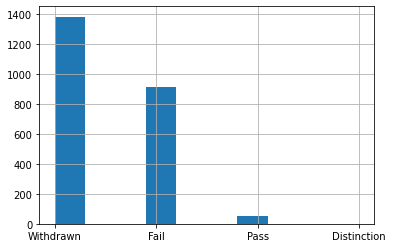

In [109]:
student_info_young_and_vle['final_result'][student_info_young_and_vle['total_clicks'] < 100].hist()

In [110]:
student_info_young_and_vle['final_result'][student_info_young_and_vle['click_frequency'] < 50].value_counts()

Withdrawn      1630
Fail           1090
Pass             66
Distinction       1
Name: final_result, dtype: int64

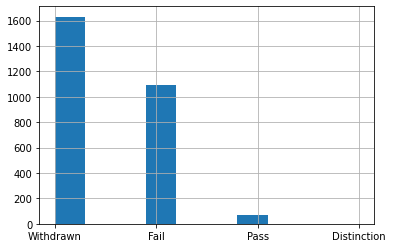

In [111]:
student_info_young_and_vle['final_result'][student_info_young_and_vle['click_frequency'] < 50].hist()

Students who engaged very little were most likely to withdraw or fail. Few passed and almost none passed with distinction.

In [112]:
student_info_young_and_vle['assessment_score_avg'][student_info_young_and_vle['total_clicks'] < 100].value_counts()

-1.000000      1571
 100.000000      40
 1.000000        31
 60.000000       27
 70.000000       23
               ... 
 53.250000        1
 71.750000        1
 87.555556        1
 69.200000        1
 82.666667        1
Name: assessment_score_avg, Length: 254, dtype: int64

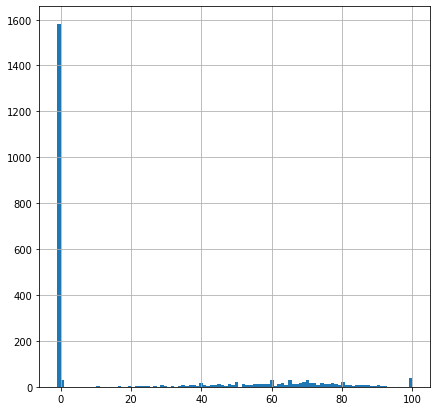

In [113]:
student_info_young_and_vle['assessment_score_avg'][student_info_young_and_vle['total_clicks'] < 100].hist(bins=100, figsize=(7,7))

In [114]:
student_info_young_and_vle['assessment_score_avg'][student_info_young_and_vle['click_frequency'] < 50].value_counts()

-1.000000      1753
 100.000000      46
 1.000000        36
 60.000000       31
 50.000000       28
               ... 
 93.333333        1
 38.333333        1
 45.200000        1
 89.200000        1
 40.600000        1
Name: assessment_score_avg, Length: 306, dtype: int64

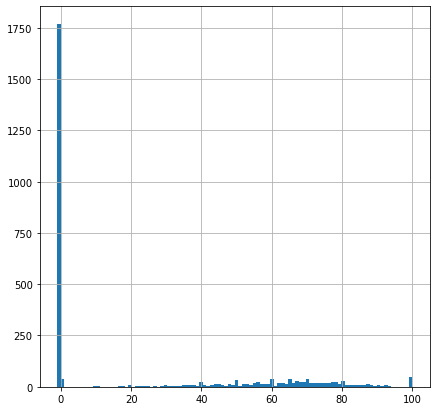

In [115]:
student_info_young_and_vle['assessment_score_avg'][student_info_young_and_vle['click_frequency'] < 50].hist(bins=100, figsize=(7,7))

In [116]:
not_withdrawn = student_info_young_and_vle[student_info_young_and_vle['final_result'] != 'Withdrawn']

In [117]:
not_withdrawn['final_result'][not_withdrawn['total_clicks'] < 100].value_counts()

Fail           914
Pass            51
Distinction      1
Name: final_result, dtype: int64

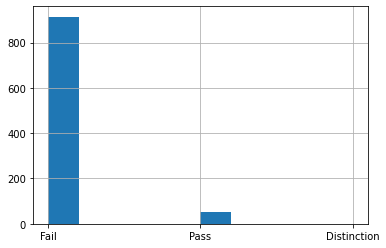

In [118]:
not_withdrawn['final_result'][not_withdrawn['total_clicks'] < 100].hist()

In [119]:
not_withdrawn['final_result'][not_withdrawn['click_frequency'] < 50].value_counts()

Fail           1090
Pass             66
Distinction       1
Name: final_result, dtype: int64

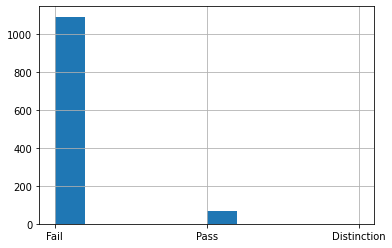

In [120]:
not_withdrawn['final_result'][not_withdrawn['click_frequency'] < 50].hist()

For the students that did not withdraw and did not engage much, they were very likely to fail.

In [121]:
not_withdrawn['assessment_score_avg'][not_withdrawn['total_clicks'] < 100].value_counts()

-1.000000     478
 60.000000     20
 70.000000     16
 50.000000     13
 40.000000     12
             ... 
 63.111111      1
 83.333333      1
 66.857143      1
 47.500000      1
 52.666667      1
Name: assessment_score_avg, Length: 217, dtype: int64

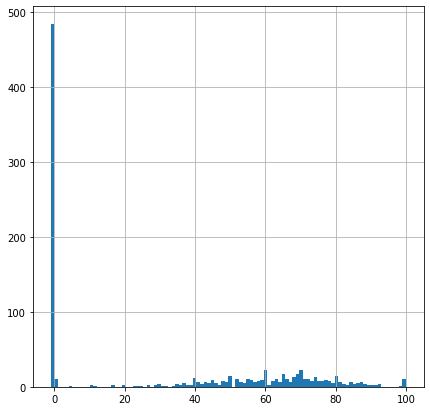

In [122]:
not_withdrawn['assessment_score_avg'][not_withdrawn['total_clicks'] < 100].hist(bins=100, figsize=(7,7))

In [123]:
not_withdrawn['assessment_score_avg'][not_withdrawn['click_frequency'] < 50].value_counts()

-1.000000     523
 60.000000     23
 70.000000     18
 50.000000     17
 40.000000     16
             ... 
 53.500000      1
 62.500000      1
 65.777778      1
 45.500000      1
 81.666667      1
Name: assessment_score_avg, Length: 262, dtype: int64

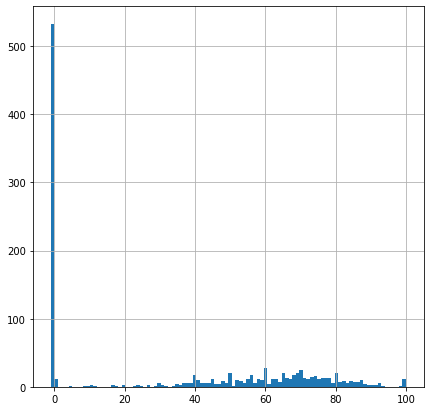

In [124]:
not_withdrawn['assessment_score_avg'][not_withdrawn['click_frequency'] < 50].hist(bins=100, figsize=(7,7))

Even when considering only students who did not withdraw (in order to not mistakenly consider the assignments that the students that withdrew did not take), those who engaged on the website less ended up not taking assessments and thus did poorly in the class.

Being engaged in the websites that are teaching the course content is very important when learning virtually. Teachers should keep this in mind when creating the syllabus and planning course materials for the semester. When sitting at home on a computer, there are many distractions that students face and it is a completely different learning environment. Not being engaged can harm students' ability to succeed in a course.

#### Studying how activity type affects engagement, assessment scores, and final result

In [125]:
vle['activity_type'].unique()

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)

In [126]:
activity = student_vle.merge(vle, how='left', on='id_site')

In [127]:
activity = activity.merge(student_info, how='left', on='id_student')

In [128]:
activity = activity.merge(assessment_agg, how='left', on='id_student')

In [129]:
activity.head()

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,activity_type,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,assessment_count,assessment_score_avg
0,AAA,2013J,28400,546652,-10,4,AAA,2013J,forumng,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0.0,60.0,N,Pass,5.0,66.4
1,AAA,2013J,28400,546652,-10,1,AAA,2013J,forumng,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0.0,60.0,N,Pass,5.0,66.4
2,AAA,2013J,28400,546652,-10,1,AAA,2013J,forumng,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0.0,60.0,N,Pass,5.0,66.4
3,AAA,2013J,28400,546614,-10,11,AAA,2013J,homepage,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0.0,60.0,N,Pass,5.0,66.4
4,AAA,2013J,28400,546714,-10,1,AAA,2013J,oucontent,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0.0,60.0,N,Pass,5.0,66.4


In [130]:
activity.pivot_table(index=['activity_type'], values=['assessment_score_avg', 'sum_click', 'id_student'], aggfunc=['mean', 'sum', 'count'])

mean                 ...      count          
               assessment_score_avg     id_student  ... id_student sum_click
activity_type                                       ...                     
dataplus                  81.990044  750466.730214  ...      15023     15023
dualpane                  79.301732  724161.639719  ...      12085     12085
externalquiz              72.918358  768785.378132  ...      62346     62346
folder                    77.206369  683209.149545  ...       5490      5490
forumng                   78.829499  744353.082546  ...    2873493   2873493
glossary                  76.268411  736747.779999  ...      19559     19559
homepage                  76.487800  725968.045218  ...    2106137   2106137
htmlactivity              77.491213  736007.668644  ...       7587      7587
oucollaborate             75.284716  747935.878714  ...      78929     78929
oucontent                 76.597813  725989.779111  ...    2348243   2348243
ouelluminate              75.521555  706073.851973  ...      25644     25644
ouwiki                    77.671950  725461.926587  ...     229674    229674
page                      78.134750  701455.914100  ...      55821     55821
questionnaire             80.132994  728617.349162  ...      49911     49911
quiz                      78.547155  706363.833760  ...    1125385   1125385
repeatactivity            86.763889  561599.833333  ...          6         6
resource                  75.353436  735252.332131  ...    1000581   1000581
sharedsubpage             79.552977  642112.000000  ...        160       160
subpage                   76.045150  737042.719112  ...    2356718   2356718
url                       76.966692  737575.785442  ...     493941    493941

[20 rows x 9 columns]

In [131]:
pass_activity = activity[activity['final_result'] == 'Pass']

In [132]:
fail_activity = activity[activity['final_result'] == 'Fail']

In [133]:
withdrawn_activity = activity[activity['final_result'] == 'Withdrawn']

In [134]:
distinction_activity = activity[activity['final_result'] == 'Distinction']

In [135]:
pass_agg = pass_activity.pivot_table(index=[ 'activity_type'], values=[ 'sum_click'], aggfunc=['sum', 'count'])

In [136]:
pass_agg.columns = ['total_clicks','click_frequency']

In [137]:
pass_agg

,total_clicks,click_frequency
activity_type,,
dataplus,30316,8744
dualpane,13005,6381
externalquiz,41075,32463
folder,4187,3625
forumng,4843409,1494009
glossary,53806,10839
homepage,4359942,1112189
htmlactivity,4243,3130
oucollaborate,71567,42721


In [138]:
fail_agg = fail_activity.pivot_table(index=[ 'activity_type'], values=[ 'sum_click'], aggfunc=[ 'sum', 'count'])

In [139]:
fail_agg.columns = ['total_clicks','click_frequency']

In [140]:
fail_agg

,total_clicks,click_frequency
activity_type,,
dataplus,1935,553
dualpane,3104,1348
externalquiz,11005,8499
folder,617,499
forumng,931522,294452
glossary,9215,2188
homepage,967940,261994
htmlactivity,1327,1013
oucollaborate,13055,7702


In [141]:
withdrawn_agg = withdrawn_activity.pivot_table(index=[ 'activity_type'], values=[ 'sum_click'], aggfunc=[ 'sum', 'count'])

In [142]:
withdrawn_agg.columns = ['total_clicks','click_frequency']

In [143]:
withdrawn_agg

,total_clicks,click_frequency
activity_type,,
dataplus,2314,693
dualpane,3368,1503
externalquiz,13082,10214
folder,504,424
forumng,1199710,371825
glossary,12418,2392
homepage,1153330,293614
htmlactivity,2602,1975
oucollaborate,19283,11024


In [144]:
distinction_agg = distinction_activity.pivot_table(index=[ 'activity_type'], values=[ 'sum_click'], aggfunc=[ 'sum', 'count'])

In [145]:
distinction_agg.columns = ['total_clicks','click_frequency']

In [146]:
distinction_agg

,total_clicks,click_frequency
activity_type,,
dataplus,14967,4091
dualpane,4373,2169
externalquiz,8931,7493
folder,755,679
forumng,2021961,584844
glossary,19680,3465
homepage,1517234,345737
htmlactivity,1482,1093
oucollaborate,19549,12242


We will visualize this information in a later section.

#### Using visualizations to students that passed, failed, withdrew, or passed with distinction depending on engagement

In [147]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12866733 entries, 0 to 12866732
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   code_module_x         object 
 1   code_presentation_x   object 
 2   id_student            int64  
 3   id_site               int64  
 4   date                  int64  
 5   sum_click             int64  
 6   code_module_y         object 
 7   code_presentation_y   object 
 8   activity_type         object 
 9   code_module           object 
 10  code_presentation     object 
 11  gender                object 
 12  region                object 
 13  highest_education     object 
 14  imd_band              object 
 15  age_band              object 
 16  num_of_prev_attempts  float64
 17  studied_credits       float64
 18  disability            object 
 19  final_result          object 
 20  assessment_count      float64
 21  assessment_score_avg  float64
dtypes: float64(4), int64(4), object(14)
memo

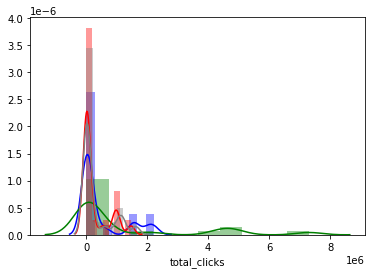

In [148]:
sns.distplot(distinction_agg['total_clicks'], color='blue')
sns.distplot(pass_agg['total_clicks'], color = 'green')
sns.distplot(fail_agg['total_clicks'], color = 'red')
sns.distplot(withdrawn_agg['total_clicks'], color = 'gray')

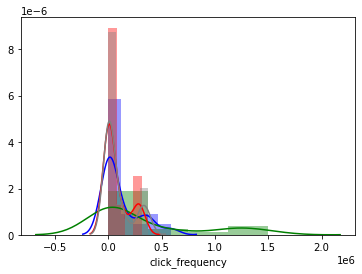

In [149]:
sns.distplot(distinction_agg['click_frequency'], color='blue')
sns.distplot(pass_agg['click_frequency'], color = 'green')
sns.distplot(fail_agg['click_frequency'], color = 'red')
sns.distplot(withdrawn_agg['click_frequency'], color = 'gray')

This confirms our findings that engagement is important for students to pass.

#### Using visualizations to compare different groups and their assessment score averages and final results

green: pass

red: fail

gray: withdrawn

blue: distinction

##### final result by engagement frequency

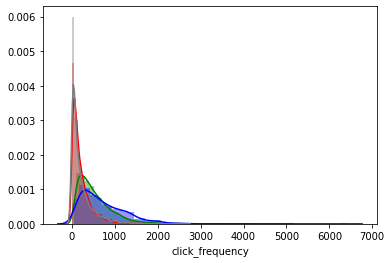

In [150]:
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['final_result'] == 'Pass')]['click_frequency'], color = 'green')
sns.distplot(student_info_young_and_vle[ (student_info_young_and_vle['final_result'] == 'Fail')]['click_frequency'], color = 'red')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['final_result'] == 'Distinction')]['click_frequency'], color = 'blue')
sns.distplot(student_info_young_and_vle[ (student_info_young_and_vle['final_result'] == 'Withdrawn')]['click_frequency'], color = 'gray')

##### disability

engagement (green: disability, red: no disability)

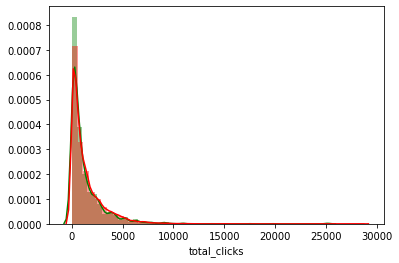

In [151]:
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['disability'] == 'Y']['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['disability'] == 'N']['total_clicks'], color = 'red')

assessment score average (green: disability, red: no disability)

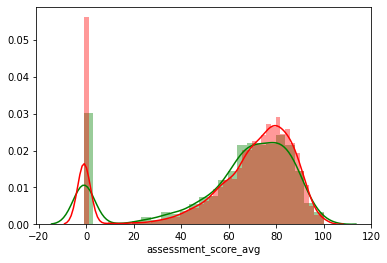

In [152]:
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['disability'] == 'Y']['assessment_score_avg'], color = 'green')
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['disability'] == 'N']['assessment_score_avg'], color = 'red')

engagement by final score of students with disabilities

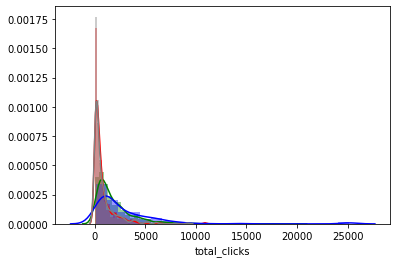

In [153]:
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'Y') & (student_info_young_and_vle['final_result'] == 'Pass')]['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'Y') & (student_info_young_and_vle['final_result'] == 'Fail')]['total_clicks'], color = 'red')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'Y') & (student_info_young_and_vle['final_result'] == 'Distinction')]['total_clicks'], color = 'blue')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'Y') & (student_info_young_and_vle['final_result'] == 'Withdrawn')]['total_clicks'], color = 'gray')

engagement by final score of students without disabilities

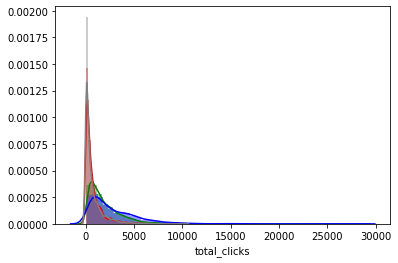

In [154]:
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'N') & (student_info_young_and_vle['final_result'] == 'Pass')]['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'N') & (student_info_young_and_vle['final_result'] == 'Fail')]['total_clicks'], color = 'red')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'N') & (student_info_young_and_vle['final_result'] == 'Distinction')]['total_clicks'], color = 'blue')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['disability'] == 'N') & (student_info_young_and_vle['final_result'] == 'Withdrawn')]['total_clicks'], color = 'gray')

##### gender

engagement (green: female, red: male)

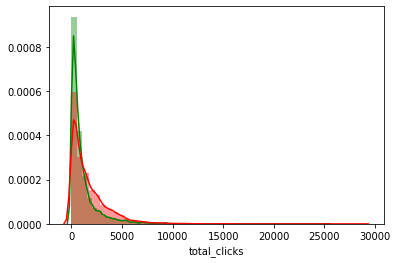

In [155]:
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['gender'] == 'F']['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['gender'] == 'M']['total_clicks'], color = 'red')

assessment score average (green: female, red: male)

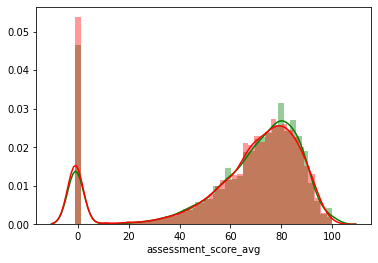

In [156]:
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['gender'] == 'F']['assessment_score_avg'], color = 'green')
sns.distplot(student_info_young_and_vle[student_info_young_and_vle['gender'] == 'M']['assessment_score_avg'], color = 'red')

engagement by final score of female students 

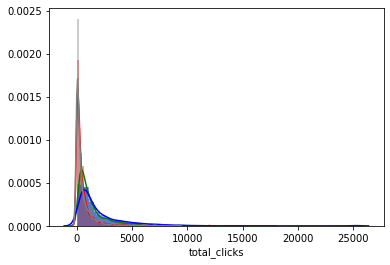

In [157]:
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'F') & (student_info_young_and_vle['final_result'] == 'Pass')]['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'F') & (student_info_young_and_vle['final_result'] == 'Fail')]['total_clicks'], color = 'red')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'F') & (student_info_young_and_vle['final_result'] == 'Distinction')]['total_clicks'], color = 'blue')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'F') & (student_info_young_and_vle['final_result'] == 'Withdrawn')]['total_clicks'], color = 'gray')

engagement by final score of male students 

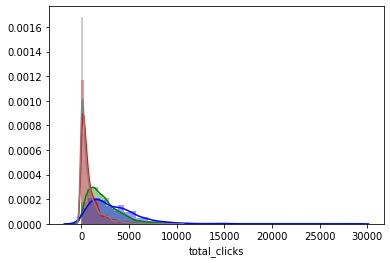

In [158]:
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'M') & (student_info_young_and_vle['final_result'] == 'Pass')]['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'M') & (student_info_young_and_vle['final_result'] == 'Fail')]['total_clicks'], color = 'red')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'M') & (student_info_young_and_vle['final_result'] == 'Distinction')]['total_clicks'], color = 'blue')
sns.distplot(student_info_young_and_vle[(student_info_young_and_vle['gender'] == 'M') & (student_info_young_and_vle['final_result'] == 'Withdrawn')]['total_clicks'], color = 'gray')

##### poverty level 

engagement (low poverty: blue, medium poverty: gray, high poverty: red)

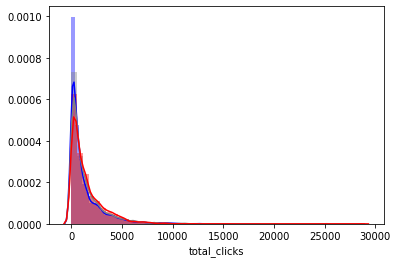

In [159]:
sns.distplot(student_info_young_and_vle['total_clicks'][(student_info_young_and_vle['imd_band']==  '10-20%') | (student_info_young_and_vle['imd_band']==  '0-10%') | (student_info_young_and_vle['imd_band']==  '20-30%')], color ='blue')
sns.distplot(student_info_young_and_vle['total_clicks'][(student_info_young_and_vle['imd_band']==  '30-40%') | (student_info_young_and_vle['imd_band']==  '40-50%') | (student_info_young_and_vle['imd_band']==  '50-60%')], color = 'gray')
sns.distplot(student_info_young_and_vle['total_clicks'][(student_info_young_and_vle['imd_band']==  '60-70%') | (student_info_young_and_vle['imd_band']==  '70-80%') | (student_info_young_and_vle['imd_band']==  '80-90%') | (student_info_young_and_vle['imd_band']==  '90-100%')], color ='red')

assessment score average (low poverty: blue, medium poverty: gray, high poverty: red)

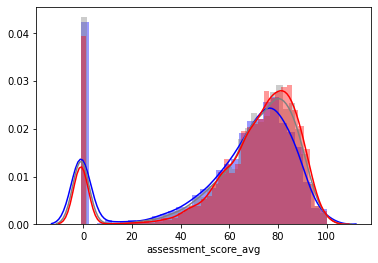

In [160]:
sns.distplot(student_info_young_and_vle['assessment_score_avg'][(student_info_young_and_vle['imd_band']==  '10-20%') | (student_info_young_and_vle['imd_band']==  '0-10%') | (student_info_young_and_vle['imd_band']==  '20-30%')], color ='blue')
sns.distplot(student_info_young_and_vle['assessment_score_avg'][(student_info_young_and_vle['imd_band']==  '30-40%') | (student_info_young_and_vle['imd_band']==  '40-50%') | (student_info_young_and_vle['imd_band']==  '50-60%')], color = 'gray')
sns.distplot(student_info_young_and_vle['assessment_score_avg'][(student_info_young_and_vle['imd_band']==  '60-70%') | (student_info_young_and_vle['imd_band']==  '70-80%') | (student_info_young_and_vle['imd_band']==  '80-90%') | (student_info_young_and_vle['imd_band']==  '90-100%')], color ='red')

engagement by final score of students who live in an area of low poverty

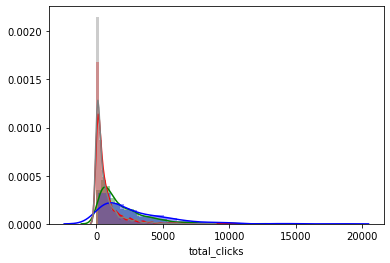

In [161]:
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '10-20%') | (student_info_young_and_vle['imd_band']==  '0-10%') | (student_info_young_and_vle['imd_band']==  '20-30%')) & (student_info_young_and_vle['final_result'] == 'Pass')]['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '10-20%') | (student_info_young_and_vle['imd_band']==  '0-10%') | (student_info_young_and_vle['imd_band']==  '20-30%')) & (student_info_young_and_vle['final_result'] == 'Fail')]['total_clicks'], color = 'red')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '10-20%') | (student_info_young_and_vle['imd_band']==  '0-10%') | (student_info_young_and_vle['imd_band']==  '20-30%')) & (student_info_young_and_vle['final_result'] == 'Distinction')]['total_clicks'], color = 'blue')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '10-20%') | (student_info_young_and_vle['imd_band']==  '0-10%') | (student_info_young_and_vle['imd_band']==  '20-30%')) & (student_info_young_and_vle['final_result'] == 'Withdrawn')]['total_clicks'], color = 'gray')

engagement by final score of students who live in an area of medium poverty

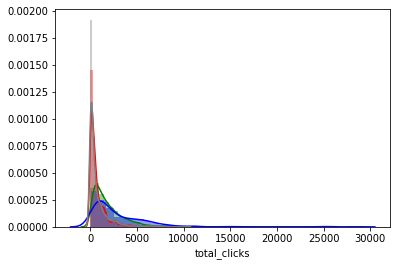

In [162]:
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '30-40%') | (student_info_young_and_vle['imd_band']==  '40-50%') | (student_info_young_and_vle['imd_band']==  '50-60%')) & (student_info_young_and_vle['final_result'] == 'Pass')]['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '30-40%') | (student_info_young_and_vle['imd_band']==  '40-50%') | (student_info_young_and_vle['imd_band']==  '50-60%')) & (student_info_young_and_vle['final_result'] == 'Fail')]['total_clicks'], color = 'red')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '30-40%') | (student_info_young_and_vle['imd_band']==  '40-50%') | (student_info_young_and_vle['imd_band']==  '50-60%')) & (student_info_young_and_vle['final_result'] == 'Distinction')]['total_clicks'], color = 'blue')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '30-40%') | (student_info_young_and_vle['imd_band']==  '40-50%') | (student_info_young_and_vle['imd_band']==  '50-60%')) & (student_info_young_and_vle['final_result'] == 'Withdrawn')]['total_clicks'], color = 'gray')

engagement by final score of students who live in an area of high poverty

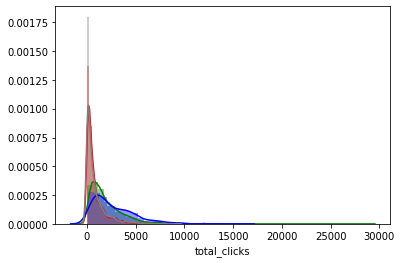

In [163]:
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '60-70%') | (student_info_young_and_vle['imd_band']==  '70-80%') | (student_info_young_and_vle['imd_band']==  '80-90%') | (student_info_young_and_vle['imd_band']==  '90-100%')) & (student_info_young_and_vle['final_result'] == 'Pass')]['total_clicks'], color = 'green')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '60-70%') | (student_info_young_and_vle['imd_band']==  '70-80%') | (student_info_young_and_vle['imd_band']==  '80-90%') | (student_info_young_and_vle['imd_band']==  '90-100%')) & (student_info_young_and_vle['final_result'] == 'Fail')]['total_clicks'], color = 'red')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '60-70%') | (student_info_young_and_vle['imd_band']==  '70-80%') | (student_info_young_and_vle['imd_band']==  '80-90%') | (student_info_young_and_vle['imd_band']==  '90-100%')) & (student_info_young_and_vle['final_result'] == 'Distinction')]['total_clicks'], color = 'blue')
sns.distplot(student_info_young_and_vle[((student_info_young_and_vle['imd_band']==  '60-70%') | (student_info_young_and_vle['imd_band']==  '70-80%') | (student_info_young_and_vle['imd_band']==  '80-90%') | (student_info_young_and_vle['imd_band']==  '90-100%')) & (student_info_young_and_vle['final_result'] == 'Withdrawn')]['total_clicks'], color = 'gray')

#### Looking for an activity type with most engagement from people with disabilities that succeed in courses

In [164]:
 activities_disabilities = activity[activity['disability']=='Y'].pivot_table(index=['final_result', 'activity_type'], values=[ 'sum_click'], aggfunc=['sum']).reset_index()

In [165]:
activities_disabilities.columns = ['final_result', 'activity_type', 'total_clicks']

In [166]:
activities_disabilities 

,final_result,activity_type,total_clicks
0,Distinction,dataplus,1114
1,Distinction,dualpane,323
2,Distinction,externalquiz,604
3,Distinction,folder,46
4,Distinction,forumng,161818
...,...,...,...
72,Withdrawn,quiz,133075
73,Withdrawn,resource,33249
74,Withdrawn,sharedsubpage,1
75,Withdrawn,subpage,102615


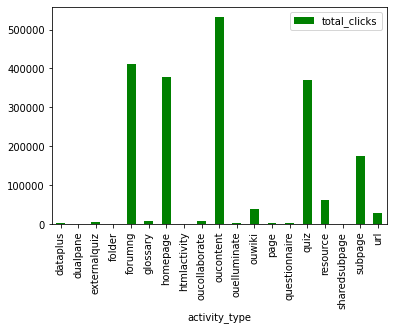

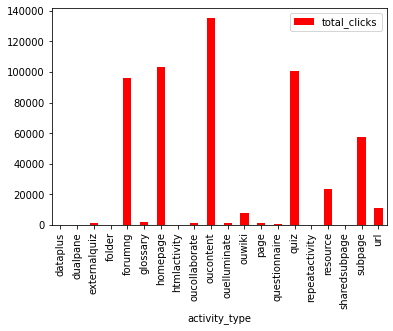

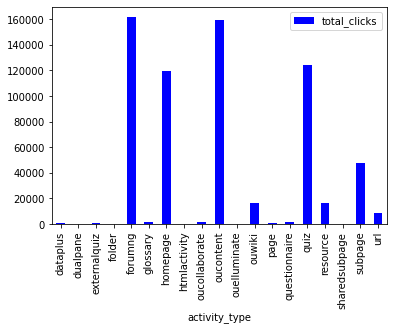

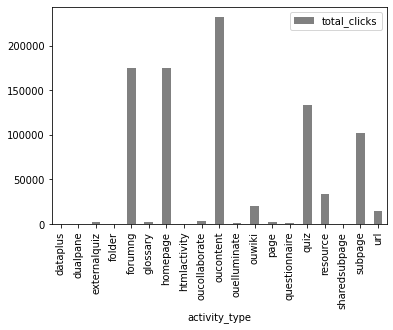

In [167]:
activities_disabilities[(activities_disabilities ['final_result'] == 'Pass')].plot.bar(x='activity_type', y='total_clicks', color='green')
activities_disabilities[(activities_disabilities ['final_result'] == 'Fail')].plot.bar(x='activity_type', y='total_clicks', color = 'red')
activities_disabilities[(activities_disabilities ['final_result'] == 'Distinction')].plot.bar(x='activity_type', y='total_clicks', color = 'blue')
activities_disabilities[(activities_disabilities ['final_result'] == 'Withdrawn')].plot.bar(x='activity_type', y='total_clicks', color = 'gray')

#### Comparing outcomes of students that have low engagement to the other students

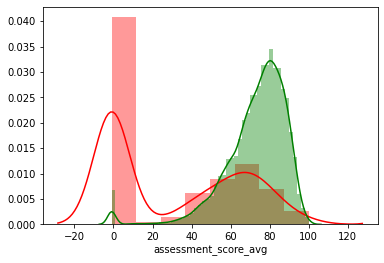

In [168]:
sns.distplot(not_withdrawn['assessment_score_avg'][not_withdrawn['total_clicks'] < 100], color = 'red')
sns.distplot(not_withdrawn['assessment_score_avg'][not_withdrawn['total_clicks'] >= 100], color = 'green')

Assessment score average is greatly affected by engagement.

In [169]:
student_info_young_and_vle[student_info_young_and_vle['total_clicks'] < 100]['imd_band'].value_counts().sort_values(ascending=False)

20-30%     350
0-10%      332
10-20      326
30-40%     252
50-60%     251
40-50%     229
60-70%     187
80-90%     156
70-80%     152
90-100%    114
Name: imd_band, dtype: int64

In [170]:
student_info_young_and_vle[student_info_young_and_vle['total_clicks'] >= 100]['imd_band'].value_counts().sort_values(ascending=False)

20-30%     2063
30-40%     2022
10-20      1976
0-10%      1840
40-50%     1839
50-60%     1758
60-70%     1657
70-80%     1649
80-90%     1599
90-100%    1460
Name: imd_band, dtype: int64

# Conclusion

Because of the emergemence of the COVID-19 pandemic, students were forced to adapt to virtual learning. Studying past data from a virtual learning environment can help teachers identify which students are more at risk of withdrawing or failing the course in this new learning environment. Then, teachers are able to give additional support to these students, who might fail or withdraw without support.

With a goal of making virtual education more inclusive, we studied the demographics of students and the connections to engagement and final results (pass, fail, distinction, withdrawn). We studied the multifaceted aspects of student identity and background in order to understand how intersectionality (of gender, poverty level, and disability) may impact their ability to engage or succeed in online courses. By studying the Multiple Depravation Index, we analyzed whether poverty level impact's student experience.

We also built a tool to help teachers predict which students need the extra support in order to pass the course. Providing some information, the model predicts whether students will fail, pass, pass with distinction, or withdraw if they do not receive any outside help.

As teachers understand which student is at risk of struggling with a course, they can better support them. Supporting students in poverty can take children out of the school-to-prison pipeline, brightening their futures. We also studied which activity types best help students with disabilities succeed in courses. It is important to support all students and see what activity type best supports the disadvantaged students that might not have the opportunity to succeed without the teachers' help.